Date: **18.11.2021**

Roll No. and Name: **19BCE245 Aayush Shah**

Course Code and Name: **2CS501 Machine Learning**

Practical: **9**

Definition : **K-Means Clustering**

Dataset taken : [UrbanGB, urban road accidents coordinates labelled by the urban center Data Set
](https://archive.ics.uci.edu/ml/datasets/UrbanGB%2C+urban+road+accidents+coordinates+labelled+by+the+urban+center)

# K-Means Clustering

Dataset information : 
- This data consists of odors of 20 different perfumes. Data was obtained by using a handheld odor meter (OMX-GR sensor) per second for 28 seconds period.

- Here we want to identify some pattern. We don't know what to predict.

## Importing the libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

- Here last column is not actually a `Dependent` variable.
- Here in order to visualise the clusters, I have taken this specific dataset from https://archive.ics.uci.edu/ website, which has only 2 attributes.

In [16]:
dataset = pd.read_csv('urbanGB.csv')
dataset.columns = ['Longitudes','Latitudes']    # given heading to columns
X = dataset.iloc[:, :].values 

In [17]:
dataset.head()

,Longitudes,Latitudes
0,-3.112550,55.8706
1,-0.088533,51.3806
2,-0.326795,51.4476
3,-3.946530,51.6594
4,-0.447304,50.8153


- Here we don't need to split the dataset in testing and training set. as we are only finding patterns in our dataset. here we don't have to predict anything too.

## Using the elbow method to find the optimal number of clusters
- with **WCSS** method
- `10` iterations for 10 clusters
- Here init method is by default `k-means++`, which is to avoid random initialization trap.

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(20):
  kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=42)   # Here init method is by default 'k-means++'. which is to avoid random initialization trap.
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)    # `inertia_` is same value as `WCSS`.
  print(f'Done {i+1} iteration : got WCSS {kmeans.inertia_}')   #printing WCSS value

Done 1 iteration : got WCSS 1314198.1760473885
Done 2 iteration : got WCSS 638138.398962545
Done 3 iteration : got WCSS 412968.1955706554
Done 4 iteration : got WCSS 252193.046096233
Done 5 iteration : got WCSS 201625.0035822029
Done 6 iteration : got WCSS 160879.36184499826
Done 7 iteration : got WCSS 134591.37193008052
Done 8 iteration : got WCSS 115643.1465636793
Done 9 iteration : got WCSS 99522.84348710926
Done 10 iteration : got WCSS 87907.40751109872
Done 11 iteration : got WCSS 78825.20943862089
Done 12 iteration : got WCSS 70420.94896284792
Done 13 iteration : got WCSS 64377.37271177996
Done 14 iteration : got WCSS 59557.21244489832
Done 15 iteration : got WCSS 53647.53541337791
Done 16 iteration : got WCSS 48815.94566799227
Done 17 iteration : got WCSS 44857.09699620689
Done 18 iteration : got WCSS 42089.07545199423
Done 19 iteration : got WCSS 39502.181265701314
Done 20 iteration : got WCSS 36994.977027471454


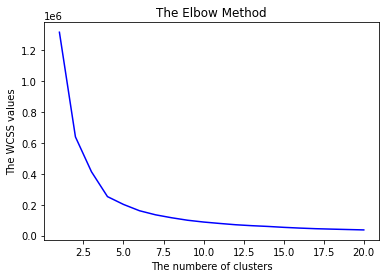

In [19]:
plt.plot(range(1,21),wcss, color='blue')
plt.title('The Elbow Method')
plt.xlabel('The numbere of clusters')
plt.ylabel('The WCSS values')
plt.show()

- From number `4`, the WCSS values decreases slowly. so `4` is the best!

## Training the K-Means model on the dataset
- Fixing cluster value as `4`

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)   # Here init method is by default 'k-means++'. which is to avoid random initialization trap.
y_kmeans = kmeans.fit_predict(X)  # Not only fits/trains the model, it also predict and returns the dependent variable.

# kmeans.fit(X) 
# y_kmeans = kmeans.predict(X) 

In [21]:
print(y_kmeans)

[1 0 0 ... 0 2 1]


## Visualising the clusters

- RAW Visualisation : 

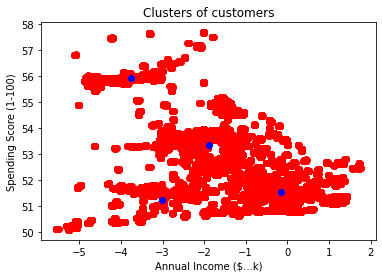

In [22]:
plt.scatter(X[:,0],X[:,1], color='red')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='blue')
plt.title('Clusters of customers')
plt.xlabel('Annual Income ($...k)')
plt.ylabel('Spending Score (1-100)')
plt.show()

- Clusters/Section Visualisation
  - `s` means size of the point
  - `label` is to give title to the specific cluster
  - `cluster_centers_` is a 2D array which has all the calculated centroid points.

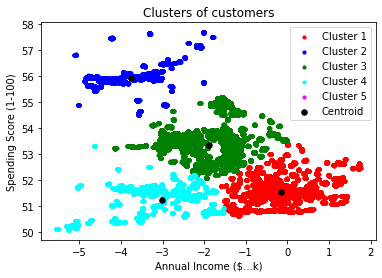

In [23]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], color='red', s=10, label='Cluster 1')    # `s` means size of the point
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], color='blue', s=10, label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], color='green', s=10, label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], color='cyan', s=10, label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], color='magenta', s=10, label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', s=30, label='Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income ($...k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- **Conclusion**
  - Here we learnt about K-Means clustering using sklearn, which uses `k-means++` inside. It is an improved version of k-means. 
  - We have taken the dataset which has only two features in order to visualise the created clusters. Most of the time, we cannot visualise the clusters as there can be more then 2 Dimentional data.
  - We have decided the number of clusters using `elbow` method.